# Exploratory Data Analysis


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [37]:
umg_data = pd.read_csv('final_merged_data.csv')
umg_data = umg_data.drop(['mode'], axis=1)
umg_data.columns

Index(['spotify_id', 'label_studio', 'content_provider_name', 'major_label',
       'original_release_date', 'genre_name', 'isrc_weekly_streams',
       'artist_name', 'song_name', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'spotify_popularity'],
      dtype='object')

In [7]:
# summary of quantitative variables
umg_data.describe()

isrc_weekly_streams  danceability        energy           key  \
count         4.696100e+04  46961.000000  46961.000000  46961.000000   
mean          6.352373e+04      0.627175      0.612045      5.296608   
std           4.592161e+05      0.169388      0.228388      3.606430   
min           3.815725e+02      0.000000      0.000020      0.000000   
25%           5.978817e+02      0.523000      0.470000      2.000000   
50%           9.454336e+03      0.649000      0.634000      5.000000   
75%           2.676748e+04      0.752000      0.788000      8.000000   
max           2.594486e+07      0.991000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  46961.000000  46961.000000  46961.000000  46961.000000   
mean      -8.399620      0.567513      0.118682      0.294372   
std        4.771991      0.495426      0.128235      0.304440   
min      -49.025000      0.000000      0.000000      0.000001   
25%       -9.868000      0.000000      0.039700      0.031700   
50%       -7.334000      1.000000      0.061000      0.176000   
75%       -5.491000      1.000000      0.148000      0.501000   
max        3.793000      1.000000      0.965000      0.996000   

       instrumentalness      liveness       valence         tempo  \
count      46961.000000  46961.000000  46961.000000  46961.000000   
mean           0.149520      0.180435      0.454329    121.560297   
std            0.306197      0.146692      0.240615     29.186277   
min            0.000000      0.012100      0.000000      0.000000   
25%            0.000000      0.096600      0.261000     98.046000   
50%            0.000021      0.120000      0.444000    122.017000   
75%            0.028500      0.213000      0.637000    140.021000   
max            1.000000      0.995000      0.987000    249.911000   

        duration_ms  spotify_popularity  
count  4.696100e+04        46961.000000  
mean   2.075674e+05           26.422563  
std    7.577113e+04           16.701706  
min    3.013300e+04            0.000000  
25%    1.673600e+05           12.000000  
50%    1.967930e+05           27.000000  
75%    2.320000e+05           38.000000  
max    3.740556e+06           94.000000

The mean popularity of songs is 26 and the median is about 27. The top 25 percent of songs are between 38 and 94 in popularity. However, it would be interesting to see a visual distribution of the popularity. The visual distribution is plotted below.

## Song Popularity

In [38]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

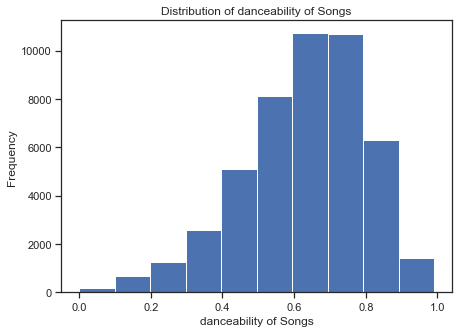

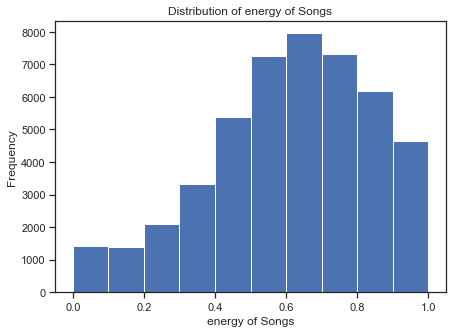

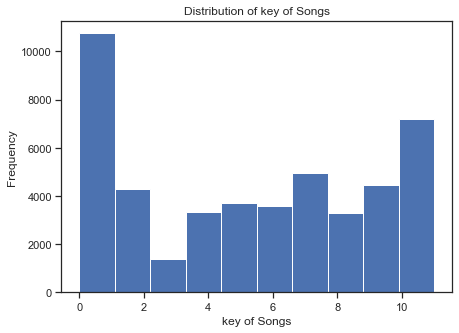

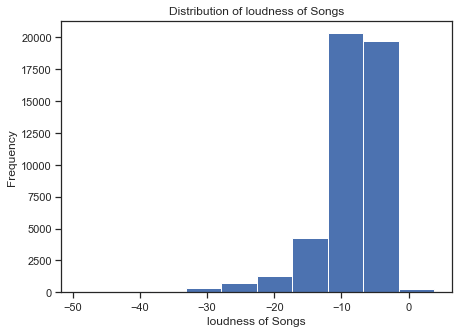

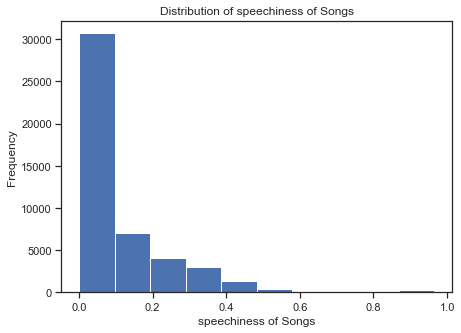

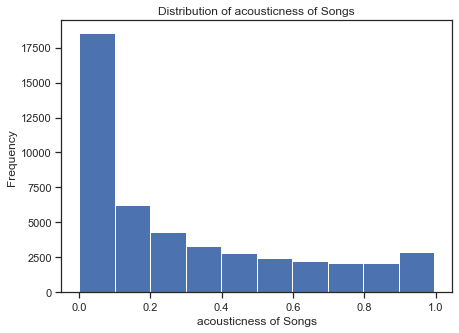

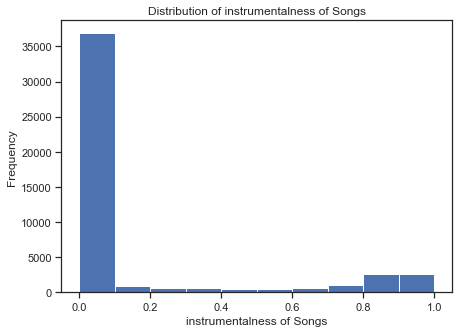

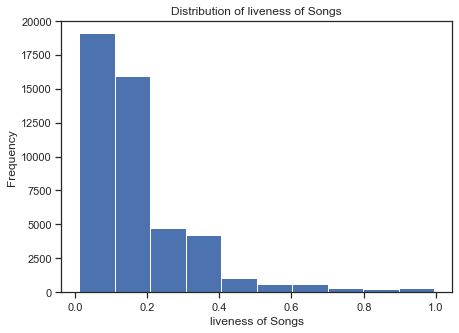

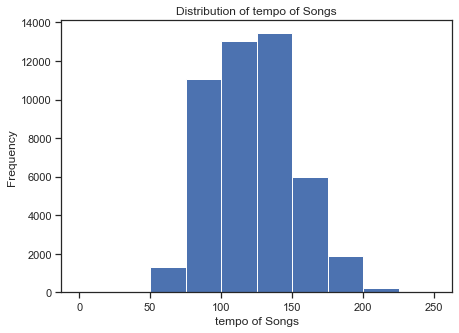

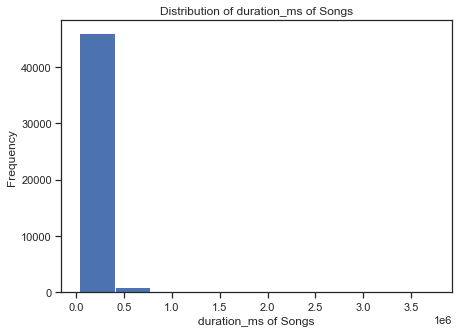

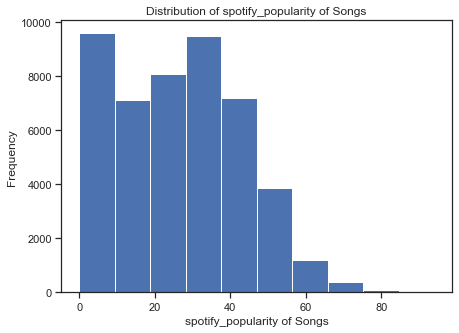

In [40]:
song_characteristics = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 
                        'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'spotify_popularity'
                       ]

def plot_distribution(df, characteristic):
    plt.figure(figsize=(7,5))
    plt.hist(df[characteristic])
    plt.title("Distribution of " + characteristic + " of Songs")
    plt.xlabel(characteristic + " of Songs")
    plt.ylabel("Frequency");
    
for characteristic in song_characteristics:
    plot_distribution(umg_data, characteristic)


From the histogram above, most of the songs are below 55 in popularity. Since the popularity scores are indexed by spotify, it may mean that it takes really a lot for spotify to decide that a song is really popular. However, from the distribution from below 55 looks to be somewhat uniform.

Now we will look at how the characteristics of the songs are correlated with each other and with the popularity of the song.

## Correlation Matrix of Song Characteristics

In [41]:
correlation = umg_data.corr()
round(correlation, 4)

isrc_weekly_streams  danceability  energy     key  \
isrc_weekly_streams               1.0000        0.0382  0.0105  0.0060   
danceability                      0.0382        1.0000  0.1598  0.0202   
energy                            0.0105        0.1598  1.0000  0.0343   
key                               0.0060        0.0202  0.0343  1.0000   
loudness                          0.0398        0.2740  0.7708  0.0244   
speechiness                       0.0046        0.2440  0.0447  0.0056   
acousticness                     -0.0128       -0.2400 -0.6845 -0.0092   
instrumentalness                 -0.0374       -0.2439 -0.2342 -0.0081   
liveness                          0.0022       -0.0985  0.2084  0.0014   
valence                           0.0237        0.4282  0.3121  0.0385   
tempo                            -0.0032       -0.0288  0.2046  0.0045   
duration_ms                      -0.0161       -0.1938  0.0758  0.0116   
spotify_popularity                0.2416       -0.0016  0.0009 -0.0055   

                     loudness  speechiness  acousticness  instrumentalness  \
isrc_weekly_streams    0.0398       0.0046       -0.0128           -0.0374   
danceability           0.2740       0.2440       -0.2400           -0.2439   
energy                 0.7708       0.0447       -0.6845           -0.2342   
key                    0.0244       0.0056       -0.0092           -0.0081   
loudness               1.0000       0.0073       -0.5592           -0.4691   
speechiness            0.0073       1.0000       -0.0566           -0.1964   
acousticness          -0.5592      -0.0566        1.0000            0.2054   
instrumentalness      -0.4691      -0.1964        0.2054            1.0000   
liveness               0.1217       0.0694       -0.0952           -0.0640   
valence                0.3172       0.1205       -0.1653           -0.2932   
tempo                  0.1805       0.0392       -0.1788           -0.0684   
duration_ms            0.0060      -0.1896       -0.0610            0.1558   
spotify_popularity     0.0670      -0.0359        0.0536           -0.0624   

                     liveness  valence   tempo  duration_ms  \
isrc_weekly_streams    0.0022   0.0237 -0.0032      -0.0161   
danceability          -0.0985   0.4282 -0.0288      -0.1938   
energy                 0.2084   0.3121  0.2046       0.0758   
key                    0.0014   0.0385  0.0045       0.0116   
loudness               0.1217   0.3172  0.1805       0.0060   
speechiness            0.0694   0.1205  0.0392      -0.1896   
acousticness          -0.0952  -0.1653 -0.1788      -0.0610   
instrumentalness      -0.0640  -0.2932 -0.0684       0.1558   
liveness               1.0000   0.0569  0.0258       0.0018   
valence                0.0569   1.0000  0.0747      -0.1571   
tempo                  0.0258   0.0747  1.0000       0.0273   
duration_ms            0.0018  -0.1571  0.0273       1.0000   
spotify_popularity     0.0089   0.0358 -0.0185      -0.0226   

                     spotify_popularity  
isrc_weekly_streams              0.2416  
danceability                    -0.0016  
energy                           0.0009  
key                             -0.0055  
loudness                         0.0670  
speechiness                     -0.0359  
acousticness                     0.0536  
instrumentalness                -0.0624  
liveness                         0.0089  
valence                          0.0358  
tempo                           -0.0185  
duration_ms                     -0.0226  
spotify_popularity               1.0000

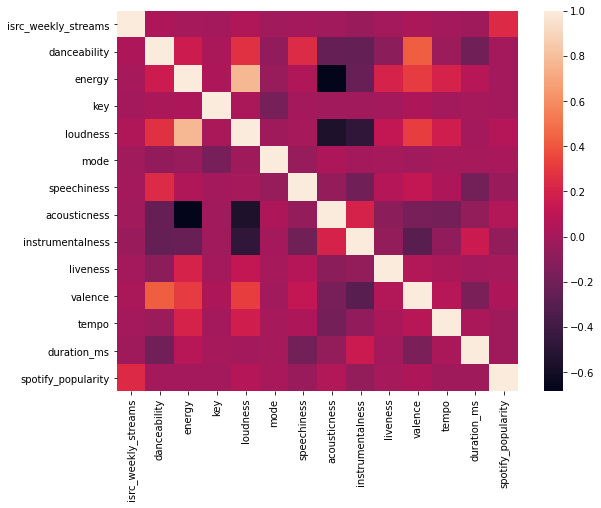

In [26]:
#visualizing correlation 
plt.figure(figsize=(9, 7))
sns.heatmap(correlation);

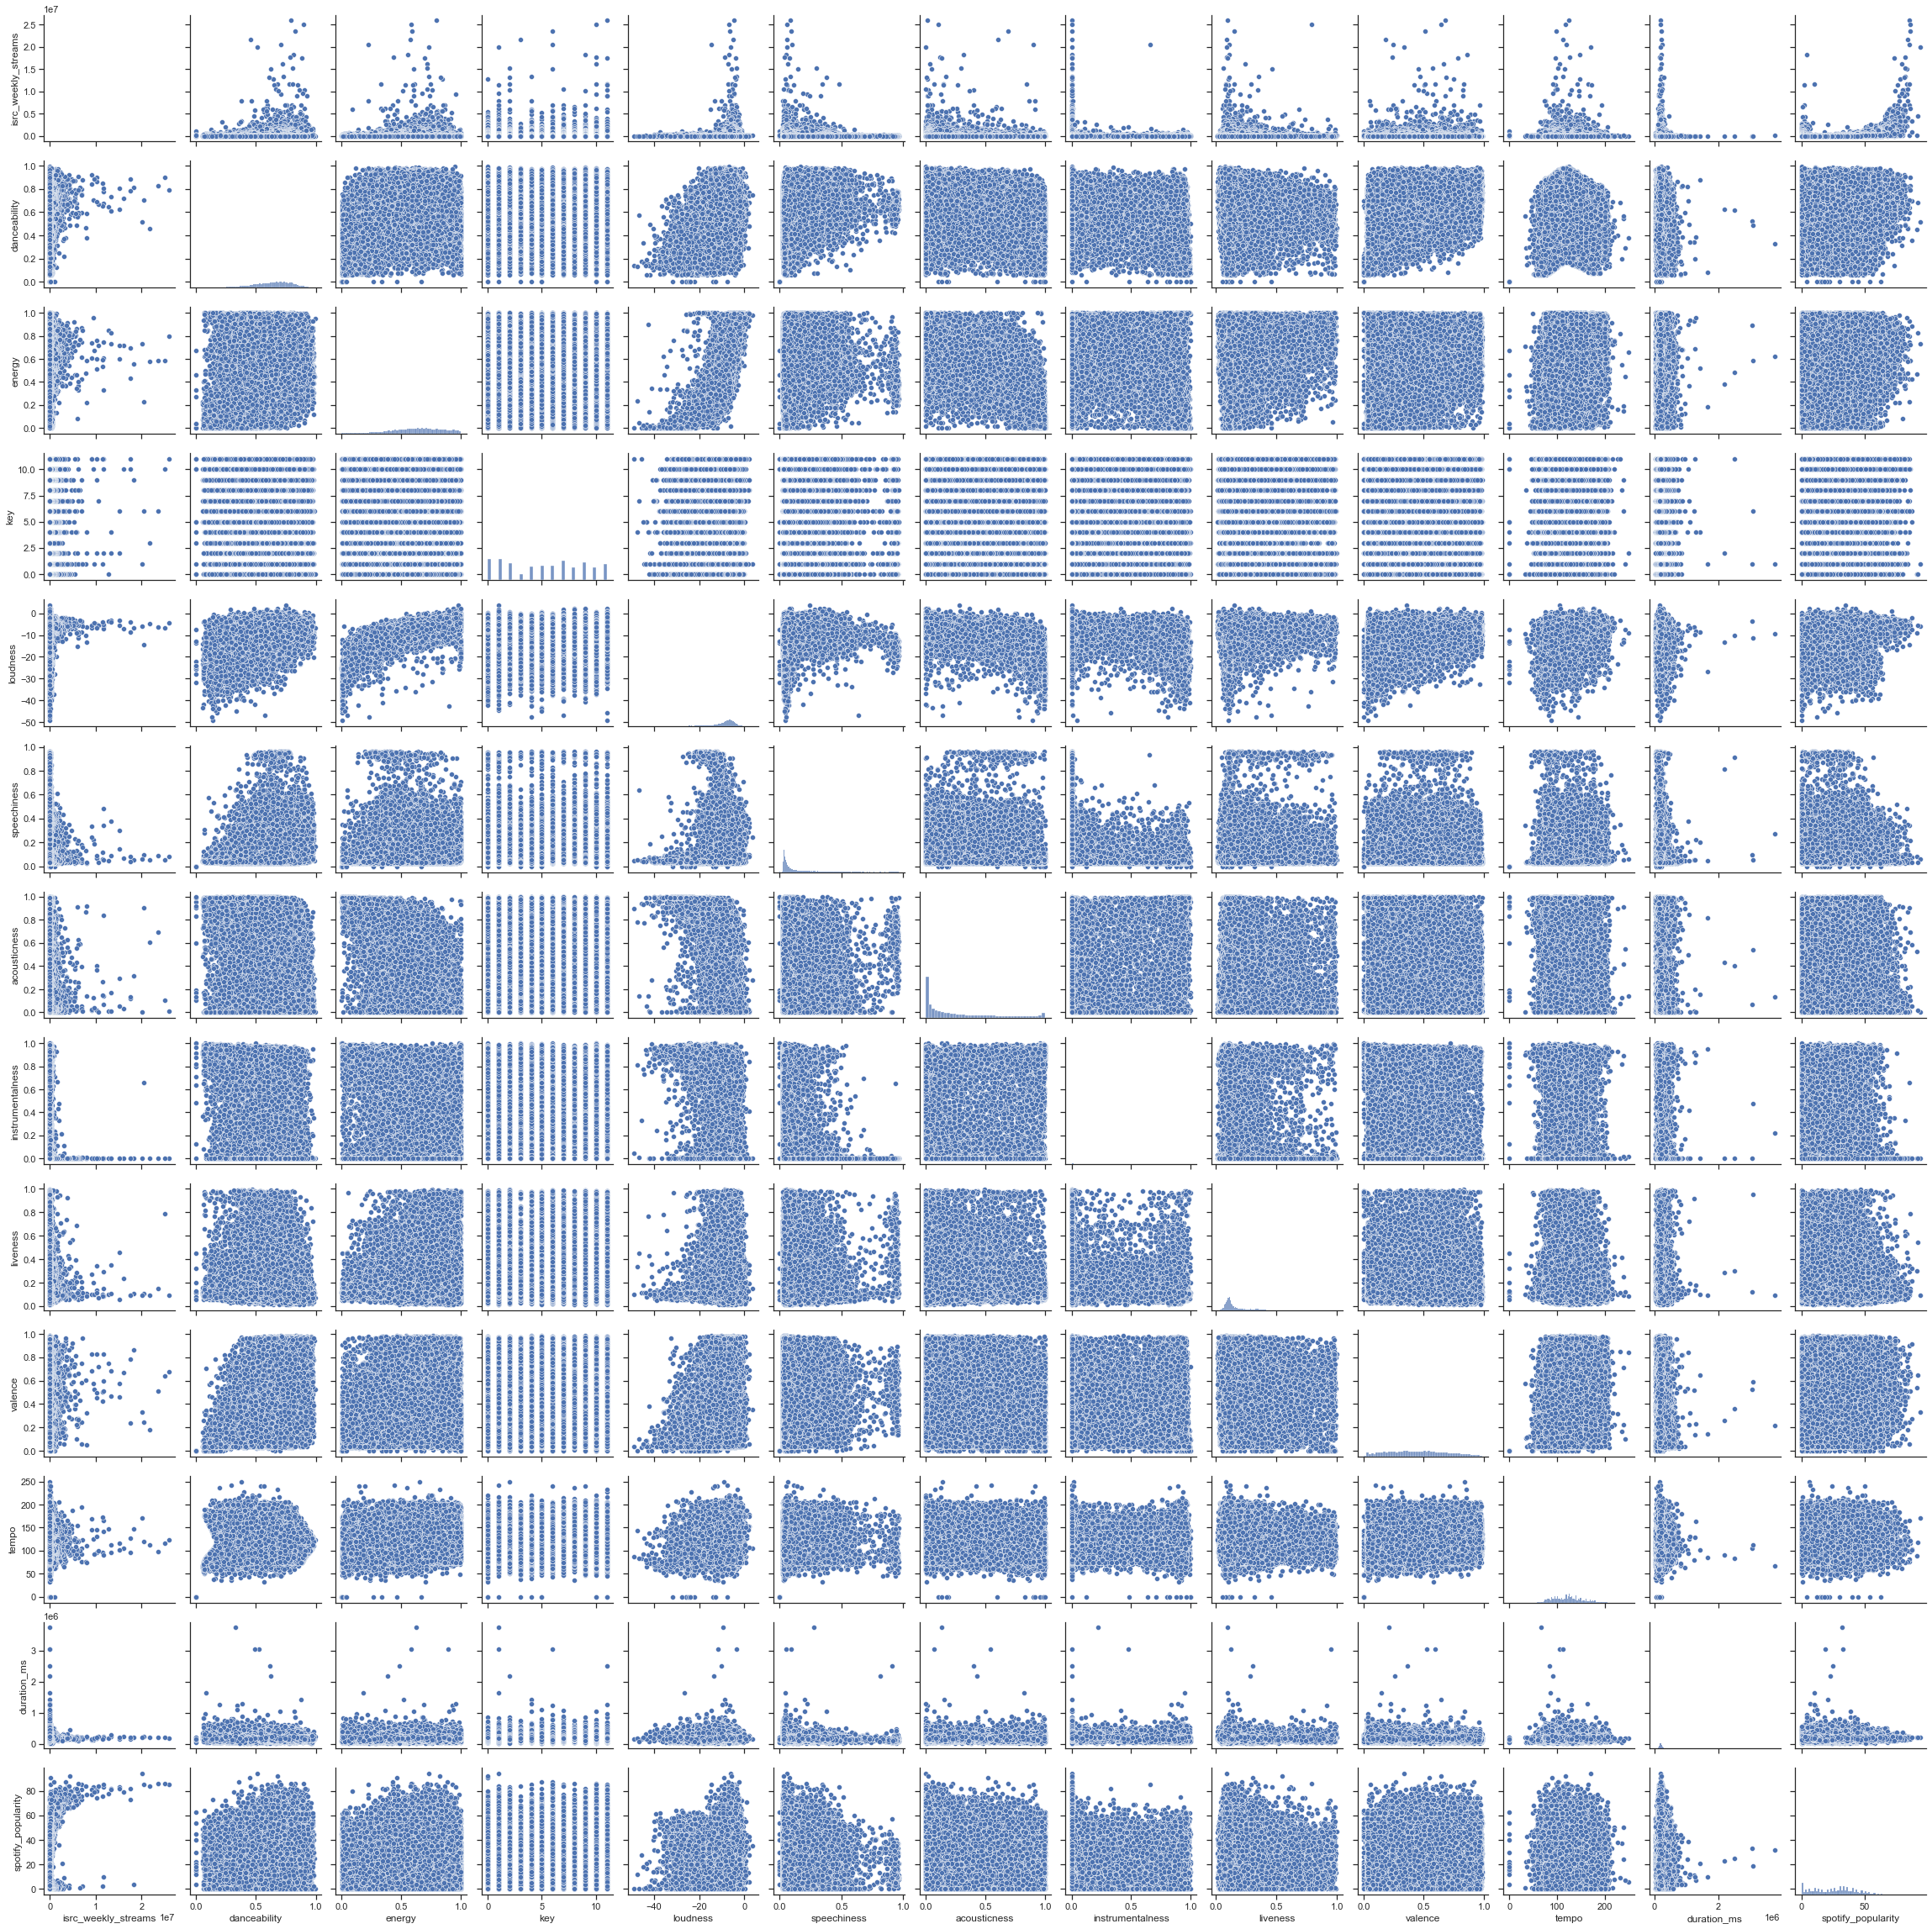

In [58]:
sns.set_theme(style='ticks')

sns.pairplot(umg_data);

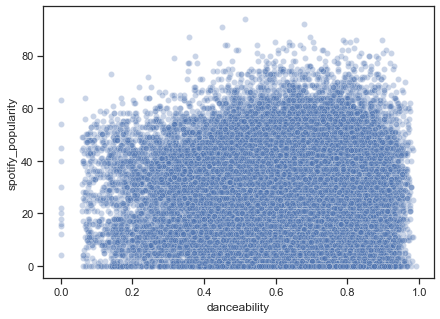

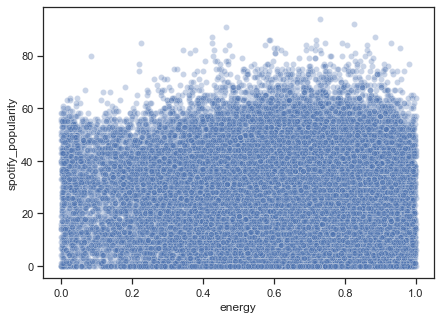

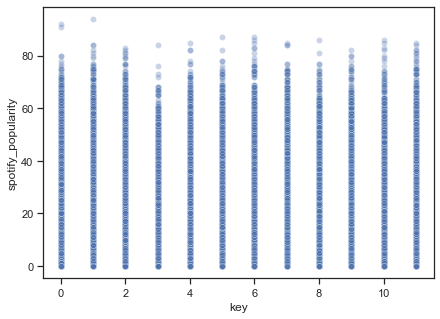

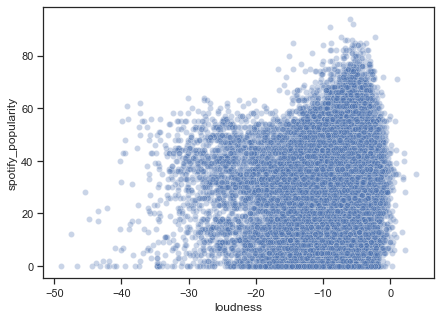

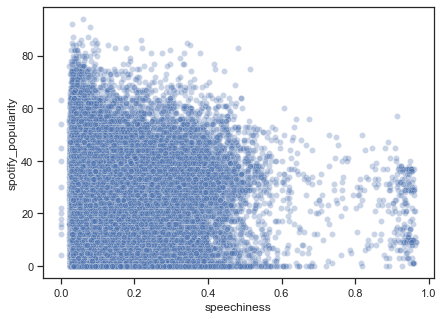

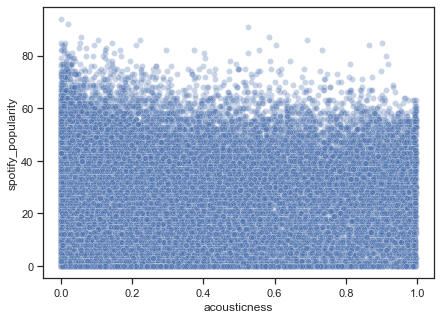

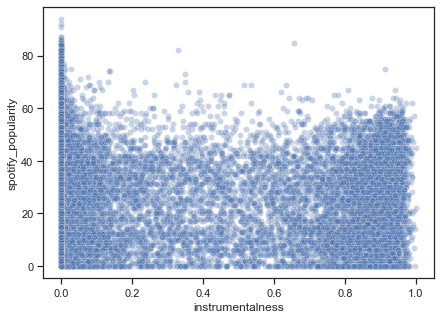

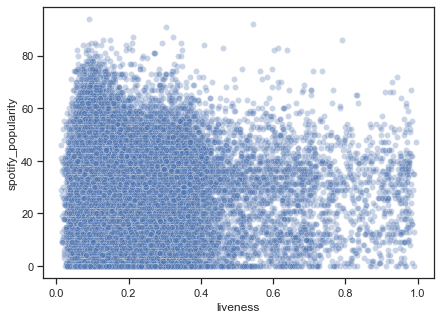

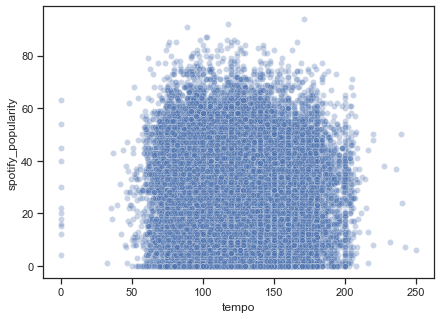

In [78]:
characteristics = song_characteristics[0:-2]

def scatter_chats(df, x, y):
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=x, y=y, data=df, alpha = 0.3);

for characteristic in characteristics:
    scatter_chats(umg_data, x=characteristic, y='spotify_popularity')